In [134]:
import sys
sys.path.insert(0,"../..")
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from get_results import read_df, get_performance_profiles

# Circle Instance Results

In [135]:
df_s = read_df("../data/ball.csv")
df_l = read_df("../data/ball_big.csv")
df = pd.concat((df_s,df_l))
_cols = ["name", "n", "s", "p", "solver", "strategy", "ratio", "time_limit"]
df = df[df.duplicated(_cols) == False]
df.loc[df["strategy"] == "all","strategy"] = "full"
df.loc[df["solver"] == "ct","strategy"] = "cut plane"
df.loc[df["solver"] == "glover","strategy"] = "glover"
df.head()

,name,n,s,p,solver,strategy,recovered_coords,partitions,ratio,time_limit,objval,bound,gap,cuts,setup_time,solve_time,total_time
341,dp_circle_4,25,2,2,coordpar,full,24,24,1.0,30,99.999503,99.999503,0.0,648,0.0,0.082727,0.082727
342,dp_circle_4,25,2,2,coordpar,full,24,24,1.0,60,99.999503,99.999503,0.0,648,0.0,0.082727,0.082727
343,dp_circle_4,25,2,2,coordpar,full,24,24,1.0,120,99.999503,99.999503,0.0,648,0.0,0.082727,0.082727
344,dp_circle_4,25,2,2,coordpar,full,24,24,1.0,300,99.999503,99.999503,0.0,648,0.0,0.082727,0.082727
345,dp_circle_4,25,2,2,coordpar,full,24,24,1.0,600,99.999503,99.999503,0.0,648,0.0,0.082727,0.082727


In [136]:
df["ratio"].unique()

array([1.  , 0.24, 0.48, 0.72, 0.5 , 0.74, 0.  , 0.25, 0.75])

There are some issues with the ratio, need to round $0.74\to 0.75$ and $0.24\to 0.25$

In [137]:
df.loc[df["ratio"]==0.24,"ratio"]=0.25
df.loc[df["ratio"]==0.48,"ratio"]=0.50
df.loc[df["ratio"]==0.72,"ratio"]=0.75
df.loc[df["ratio"]==0.74,"ratio"]=0.75
df["ratio"].unique()

array([1.  , 0.25, 0.5 , 0.75, 0.  ])

In [138]:
df = df[df.p>2]

In [139]:
df.head()

,name,n,s,p,solver,strategy,recovered_coords,partitions,ratio,time_limit,objval,bound,gap,cuts,setup_time,solve_time,total_time
755,dp_circle_4,25,2,5,coordpar,full,24,24,1.0,30,767.967622,767.967622,0.0,720,0.0,0.513987,0.513987
756,dp_circle_4,25,2,5,coordpar,full,24,24,1.0,60,767.967622,767.967622,0.0,720,0.0,0.513987,0.513987
757,dp_circle_4,25,2,5,coordpar,full,24,24,1.0,120,767.967622,767.967622,0.0,720,0.0,0.513987,0.513987
758,dp_circle_4,25,2,5,coordpar,full,24,24,1.0,300,767.967622,767.967622,0.0,720,0.0,0.513987,0.513987
759,dp_circle_4,25,2,5,coordpar,full,24,24,1.0,600,767.967622,767.967622,0.0,720,0.0,0.513987,0.513987


In [140]:
savefig = False
fig_dir = "../fig"

# Plot Style Guide

In [141]:
CM = dict(zip(df['strategy'].unique(),[mpl.colormaps["Set1"](i) for i in range(len(df['strategy'].unique()))]))
LS = dict(zip(np.sort(df['ratio'].unique())[::-1],["-","--","-.",":","-","--"]))
MS = dict(zip(np.sort(df['ratio'].unique())[::-1],["o","^","D","x","",""]))
LS[0] = "-"
MS[0] = ""

# Confirm size

In [142]:
tab = df[df["time_limit"]==1000].pivot_table(index=["s","n","p"],columns=["solver","strategy","ratio"],values="solve_time",aggfunc="size")
tab

strategy full random           stratified           cut plane glover
ratio    1.00   0.25 0.50 0.75       0.25 0.50 0.75      0.00   0.00
s n   p                                                             
2 25  5     5      5    5    5          5    5    5         5      5
  50  5     5      5    5    5          5    5    5         5      5
      10    5      5    5    5          5    5    5         5      5
  100 10    5      5    5    5          5    5    5         5      5
      20    5      5    5    5          5    5    5         5      5
5 25  5     5      5    5    5          5    5    5         5      5
  50  5     5      5    5    5          5    5    5         5      5
      10    5      5    5    5          5    5    5         5      5
  100 10    5      5    5    5          5    5    5         5      5
      20    5      5    5    5          5    5    5         5      5

# Table Results

In [143]:
_df = df[(df["time_limit"]==1000)]
_df["solved"] = _df["total_time"] < 1000
cols = [
            (      'ct',  'cut plane',  0.0),
            (  'glover',     'glover',  0.0),
            ('coordpar',     'random', 0.25),
            ('coordpar',     'random',  0.5),
            ('coordpar',     'random', 0.75),
            ('coordpar', 'stratified', 0.25),
            ('coordpar', 'stratified',  0.5),
            ('coordpar', 'stratified', 0.75),
            ('coordpar',       'full',  1.0),
            ]

rt = _df.pivot_table(index=["s","n"],columns=["solver","strategy","ratio"],values="total_time")[cols]
# rt = rt.round(2).style.format('{:.2f}')
# print(rt.to_latex(multirow_align="naive",convert_css=True))
display(rt)

gap = _df.pivot_table(index=["s","n"],columns=["solver","strategy","ratio"],values="gap")[cols]
gap *= 100
# gap = gap.round(2).style.format('{:.2f}')
# print(gap.to_latex(multirow_align="naive",convert_css=True))
display(gap)

solved = _df.pivot_table(index=["s","n"],columns=["solver","strategy","ratio"],values="solved",aggfunc="sum")[cols]
# print(solved.style.to_latex(multirow_align="naive",convert_css=True))
display(solved)

both = rt.copy()
for c in both.columns:
    both[c] = [f"{t:.2f} ({g:.2f})" for t,g in zip(rt[c],gap[c])]
display(both)
print(both.style.to_latex(multirow_align="naive",convert_css=True))

/tmp/ipykernel_102012/82062960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df["solved"] = _df["total_time"] < 1000


solver             ct       glover     coordpar                            \
strategy    cut plane       glover       random                             
ratio            0.00         0.00         0.25         0.50         0.75   
s n                                                                         
2 25         1.005222     2.261757     0.459353     0.461414     0.722477   
  50       572.827562   602.718167   267.732234   153.690761   265.429034   
  100     1000.015670  1000.005098  1000.014127  1000.025721  1000.018446   
5 25        36.885340     2.599942     3.559171     2.600689     3.730589   
  50      1009.151858   603.600272   736.518668   634.815562   675.289173   
  100     1000.022436  1000.001023  1000.030732  1000.035670  1000.022072   

solver                                                        
strategy   stratified                                   full  
ratio            0.25         0.50         0.75         1.00  
s n                                                           
2 25         0.469908     0.463831     0.634322     0.675473  
  50       234.382608   172.942448   207.212760   200.167598  
  100     1000.007638  1000.021640  1000.023031  1000.012821  
5 25         3.554168     2.248946     3.167541     3.689302  
  50       696.621267   618.387617   673.301114   641.759507  
  100     1000.045752  1000.018877  1000.049951  1000.117255

solver          ct      glover  coordpar                                 \
strategy cut plane      glover    random                     stratified   
ratio         0.00        0.00      0.25      0.50      0.75       0.25   
s n                                                                       
2 25      0.000000    0.000000  0.000000  0.000000  0.000000   0.000000   
  50      0.533534   26.317293  0.000000  0.000000  0.000000   0.000000   
  100     1.277716  119.188876  0.422266  0.383649  0.382501   0.401785   
5 25      0.000000    0.000000  0.000000  0.000000  0.000000   0.000000   
  50      6.758483   19.950473  0.646614  0.479317  0.542296   0.633800   
  100     4.579726   97.413685  2.023842  1.808274  1.843806   2.024003   

solver                                  
strategy                          full  
ratio         0.50      0.75      1.00  
s n                                     
2 25      0.000000  0.000000  0.000000  
  50      0.000000  0.001885  0.000000  
  100     0.370970  0.358102  0.366681  
5 25      0.000000  0.000000  0.000000  
  50      0.481268  0.479274  0.493900  
  100     1.755502  1.788027  1.713913

solver          ct glover coordpar                                    
strategy cut plane glover   random           stratified           full
ratio         0.00   0.00     0.25 0.50 0.75       0.25 0.50 0.75 1.00
s n                                                                   
2 25             5      5        5    5    5          5    5    5    5
  50             5      5       10   10   10         10   10    9   10
  100            0      0        0    0    0          0    0    0    0
5 25             5      5        5    5    5          5    5    5    5
  50             0      5        5    5    5          5    5    5    5
  100            0      0        0    0    0          0    0    0    0

solver                ct            glover        coordpar                  \
strategy       cut plane            glover          random                   
ratio               0.00              0.00            0.25            0.50   
s n                                                                          
2 25         1.01 (0.00)       2.26 (0.00)     0.46 (0.00)     0.46 (0.00)   
  50       572.83 (0.53)    602.72 (26.32)   267.73 (0.00)   153.69 (0.00)   
  100     1000.02 (1.28)  1000.01 (119.19)  1000.01 (0.42)  1000.03 (0.38)   
5 25        36.89 (0.00)       2.60 (0.00)     3.56 (0.00)     2.60 (0.00)   
  50      1009.15 (6.76)    603.60 (19.95)   736.52 (0.65)   634.82 (0.48)   
  100     1000.02 (4.58)   1000.00 (97.41)  1000.03 (2.02)  1000.04 (1.81)   

solver                                                                    \
strategy                      stratified                                   
ratio               0.75            0.25            0.50            0.75   
s n                                                                        
2 25         0.72 (0.00)     0.47 (0.00)     0.46 (0.00)     0.63 (0.00)   
  50       265.43 (0.00)   234.38 (0.00)   172.94 (0.00)   207.21 (0.00)   
  100     1000.02 (0.38)  1000.01 (0.40)  1000.02 (0.37)  1000.02 (0.36)   
5 25         3.73 (0.00)     3.55 (0.00)     2.25 (0.00)     3.17 (0.00)   
  50       675.29 (0.54)   696.62 (0.63)   618.39 (0.48)   673.30 (0.48)   
  100     1000.02 (1.84)  1000.05 (2.02)  1000.02 (1.76)  1000.05 (1.79)   

solver                    
strategy            full  
ratio               1.00  
s n                       
2 25         0.68 (0.00)  
  50       200.17 (0.00)  
  100     1000.01 (0.37)  
5 25         3.69 (0.00)  
  50       641.76 (0.49)  
  100     1000.12 (1.71)

\begin{tabular}{lllllllllll}
 & solver & ct & glover & \multicolumn{7}{r}{coordpar} \\
 & strategy & cut plane & glover & \multicolumn{3}{r}{random} & \multicolumn{3}{r}{stratified} & full \\
 & ratio & 0.000000 & 0.000000 & 0.250000 & 0.500000 & 0.750000 & 0.250000 & 0.500000 & 0.750000 & 1.000000 \\
s & n &  &  &  &  &  &  &  &  &  \\
2 & 25 & 1.01 (0.00) & 2.26 (0.00) & 0.46 (0.00) & 0.46 (0.00) & 0.72 (0.00) & 0.47 (0.00) & 0.46 (0.00) & 0.63 (0.00) & 0.68 (0.00) \\
 & 50 & 572.83 (0.53) & 602.72 (26.32) & 267.73 (0.00) & 153.69 (0.00) & 265.43 (0.00) & 234.38 (0.00) & 172.94 (0.00) & 207.21 (0.00) & 200.17 (0.00) \\
 & 100 & 1000.02 (1.28) & 1000.01 (119.19) & 1000.01 (0.42) & 1000.03 (0.38) & 1000.02 (0.38) & 1000.01 (0.40) & 1000.02 (0.37) & 1000.02 (0.36) & 1000.01 (0.37) \\
5 & 25 & 36.89 (0.00) & 2.60 (0.00) & 3.56 (0.00) & 2.60 (0.00) & 3.73 (0.00) & 3.55 (0.00) & 2.25 (0.00) & 3.17 (0.00) & 3.69 (0.00) \\
 & 50 & 1009.15 (6.76) & 603.60 (19.95) & 736.52 (0.65) & 634.82 (0.4

# Performance Profile

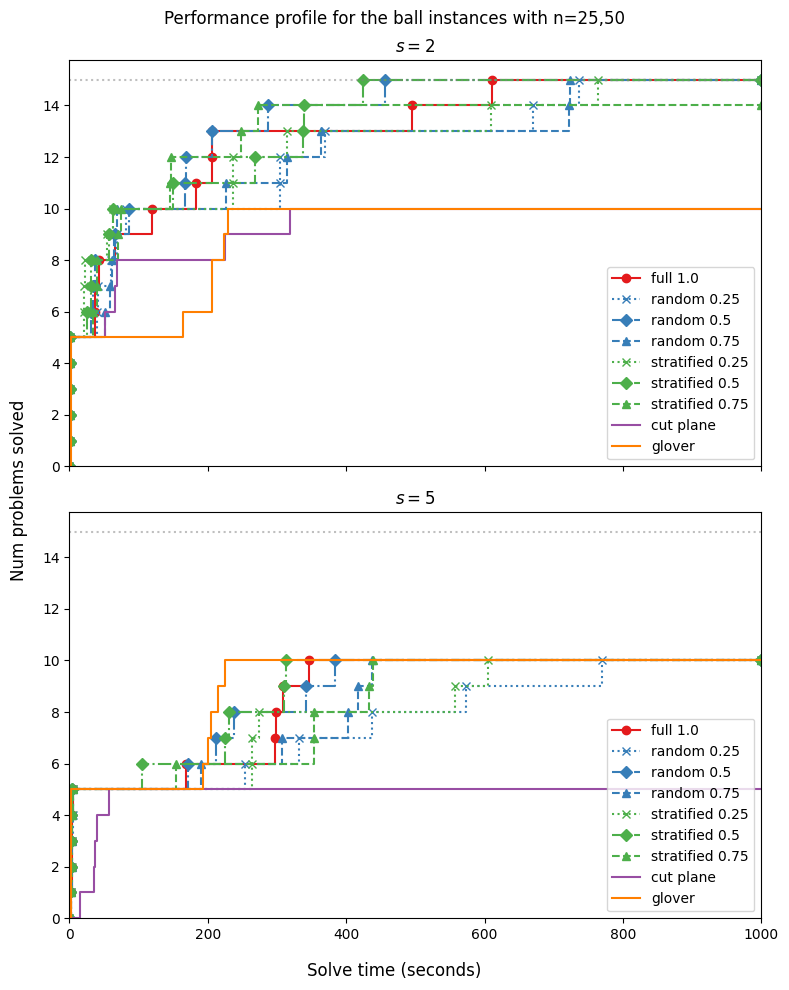

In [144]:
S = np.sort(df["s"].unique())
fig,axes = plt.subplots(len(S),figsize=(8,10),sharex=True,sharey=True)
_df = df[(df["time_limit"]==1000)&(df["n"]<100)]
for s in range(len(S)):
    __df = _df[_df["s"]==S[s]]
    pp = get_performance_profiles(__df)
    for sv,st,r in sorted(list(pp.keys())):
        axes[s].step(pp[sv,st,r][0],pp[sv,st,r][1],
            where="post",color=CM[st],ls=LS[r],marker=MS[r],
            label=f"{st} {r}" if sv=="coordpar" else f"{st}"
            )
    axes[s].axhline(y=15, color='grey', alpha=0.5, linestyle=':')
    axes[s].set_xlim(0,1000)
    axes[s].set_ylim(bottom=0)
    axes[s].set_title(f"$s={S[s]}$")
fig.supylabel("Num problems solved")
fig.supxlabel("Solve time (seconds)")
fig.suptitle("Performance profile for the ball instances with n=25,50")

axes[0].legend()
axes[1].legend()

fig.tight_layout()
if savefig: 
    fig.savefig(f"{fig_dir}/pp_ball.pdf", bbox_inches="tight")
plt.show()

# Primal-Dual Gap

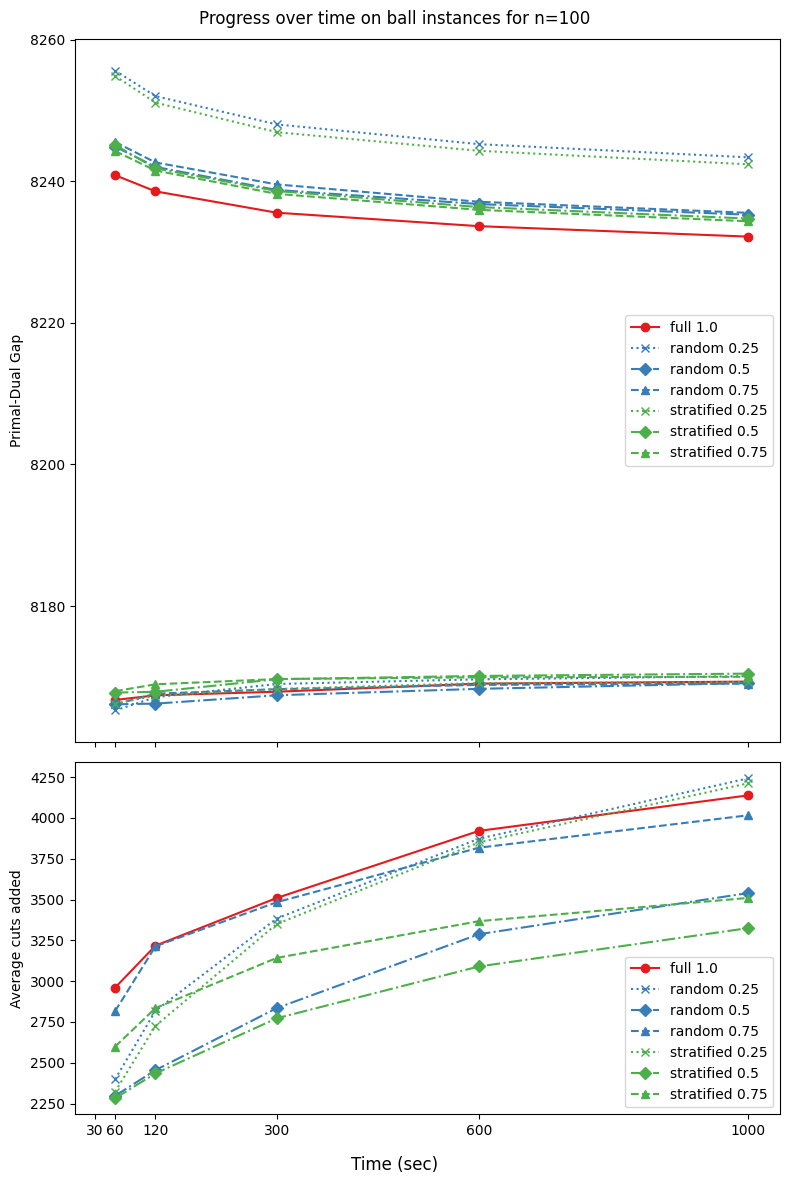

In [145]:
_df = df[(df["solver"]=="coordpar") & (df["n"] == 100) & (df["time_limit"] > 30)]
fig,axes = plt.subplots(2,figsize=(8,12),sharex=True,gridspec_kw={'height_ratios': [2, 1]})
for st in _df["strategy"].unique():
    for r in _df[_df["strategy"]==st]["ratio"].unique():
        G = _df[(_df["strategy"]==st) & (_df["ratio"]==r)].groupby(by=["time_limit"])["bound"].mean()
        axes[0].plot(G,color=CM[st],ls=LS[r],marker=MS[r],label=f"{st} {r}")
        G = _df[(_df["strategy"]==st) & (_df["ratio"]==r)].groupby(by=["time_limit"])["objval"].mean()
        axes[0].plot(G,color=CM[st],ls=LS[r],marker=MS[r])#,label=f"{st} {r}")
        G = _df[(_df["strategy"]==st) & (_df["ratio"]==r)].groupby(by=["time_limit"])["cuts"].mean()
        axes[1].plot(G,color=CM[st],ls=LS[r],marker=MS[r],label=f"{st} {r}")
axes[0].set_xlim(left=0)
# axes[0].set_ylim(bottom=0)
axes[0].set_xticks([30,60,120,300,600,1000])
axes[0].set_ylabel("Primal-Dual Gap")
axes[1].set_ylabel("Average cuts added")
axes[0].legend()
axes[1].legend()
fig.supxlabel("Time (sec)")
fig.suptitle("Progress over time on ball instances for n=100")
plt.tight_layout()
if savefig: 
    plt.savefig(f"{fig_dir}/pd_ball.pdf")
plt.show()